# Gaussian Mixture Models - EM algorithm

A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset.

Under the hood, a Gaussian mixture model is very similar to k-means: it uses an expectation-maximization approach which qualitatively does the following:

Repeat until converged:

- **E-step**: for each point, find weights encoding the probability of membership in each cluster
- **M-step**: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights

## Loading data from csv file


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

faithful = pd.read_csv('faithful.csv')
faithful.columns = ['eruptions', 'waiting']
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## Show the data
Consider the length of the eruption as x-axis and the time between eruptions as y-axis.

Text(0,0.5,u'Time between eruptions (minutes)')

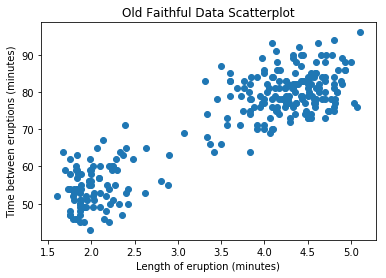

In [2]:
faithful.columns = ['eruptions', 'waiting']

plt.scatter(faithful.eruptions, faithful.waiting)
plt.title('Old Faithful Data Scatterplot')
plt.xlabel('Length of eruption (minutes)')
plt.ylabel('Time between eruptions (minutes)')

## Fit a GMM

Fix the number of desired Gaussians and iteratively determine the labels and the parameters until convergence.
When fitted, show the Z matrix of the hidden variables.

In [9]:
gmm = GaussianMixture(n_components=2).fit(faithful)

Z = gmm.predict_proba(faithful)

# show the z values for the first 5 data points
print(Z[:5].round(3))

[[ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]]


In [10]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

## Show results
Plot the original data and the determined Gaussians assigning a color to each of the clusters.

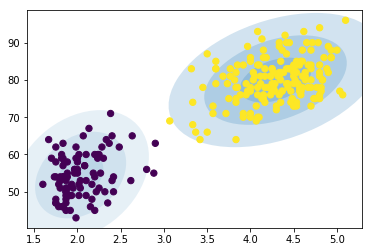

In [11]:
faith = np.array(faithful)
plot_gmm(gmm, faith)